<a href="https://colab.research.google.com/github/namvukhoa/Machine-Learning-Practice/blob/Random-Forest-Alg/Practice_Random_Forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Random Forest algorithm 

Trong bài thực hành này phần lý thuyết tôi xin phép được chia sẻ bài viết mà tôi nghĩ nội dung dễ hiểu và dễ nắm bắt. Lý thuyết bài viết được trích từ nguồn [Machine Learning cho dữ liệu dạng bảng](https://machinelearningcoban.com/tabml_book/ch_model/random_forest.html) của Anh Vũ Hữu Tiệp (PhD), tác giả bài viết: Tuấn Nguyễn


Random forest là thuật toán supervised learning, có thể giải quyết cả bài toán regression và classification. 

## Giới thiệu về thuật toán Random Forest

Random là ngẫu nhiên, Forest là rừng, nên ở thuật toán Random Forest mình sẽ xây dựng nhiều cây quyết định bằng thuật toán Decision Tree, tuy nhiên mỗi cây quyết định sẽ khác nhau (có yếu tố random). Sau đó kết quả dự đoán được tổng hợp từ các cây quyết định.

Ở bước huấn luyện thì mình sẽ xây dựng nhiều cây quyết định, các cây quyết định có thể khác nhau (phần sau mình sẽ nói mỗi cây được xây dựng như thế nào).

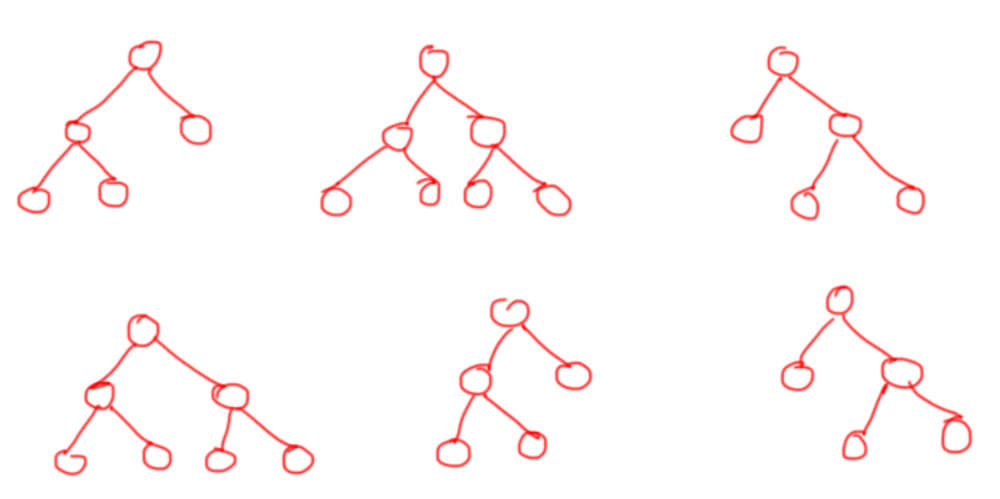

Sau đó ở bước dự đoán, với một dữ liệu mới, thì ở mỗi cây quyết định mình sẽ đi từ trên xuống theo các node điều kiện để được các dự đoán, sau đó kết quả cuối cùng được tổng hợp từ kết quả của các cây quyết định.

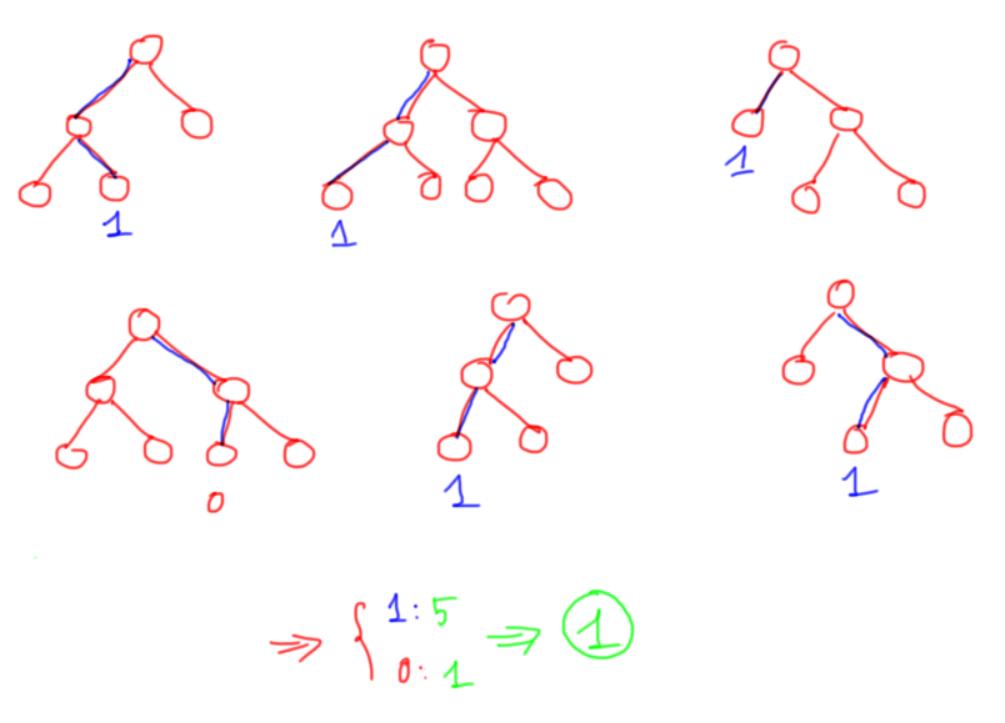

Ví dụ như trên, thuật toán Random Forest có 6 cây quyết định, 5 cây dự đoán 1 và 1 cây dự đoán 0, do đó mình sẽ vote là cho ra dự đoán cuối cùng là 1.

## Xây dựng thuật toán Random Forest

Giả sử bộ dữ liệu của mình có n dữ liệu (sample) và mỗi dữ liệu có d thuộc tính (feature).

Để xây dựng mỗi cây quyết định mình sẽ làm như sau:

1) Lấy ngẫu nhiên n dữ liệu từ bộ dữ liệu với kĩ thuật Bootstrapping, hay còn gọi là random sampling with replacement. Tức khi mình sample được 1 dữ liệu thì mình không bỏ dữ liệu đấy ra mà vẫn giữ lại trong tập dữ liệu ban đầu, rồi tiếp tục sample cho tới khi sample đủ n dữ liệu. Khi dùng kĩ thuật này thì tập n dữ liệu mới của mình có thể có những dữ liệu bị trùng nhau.

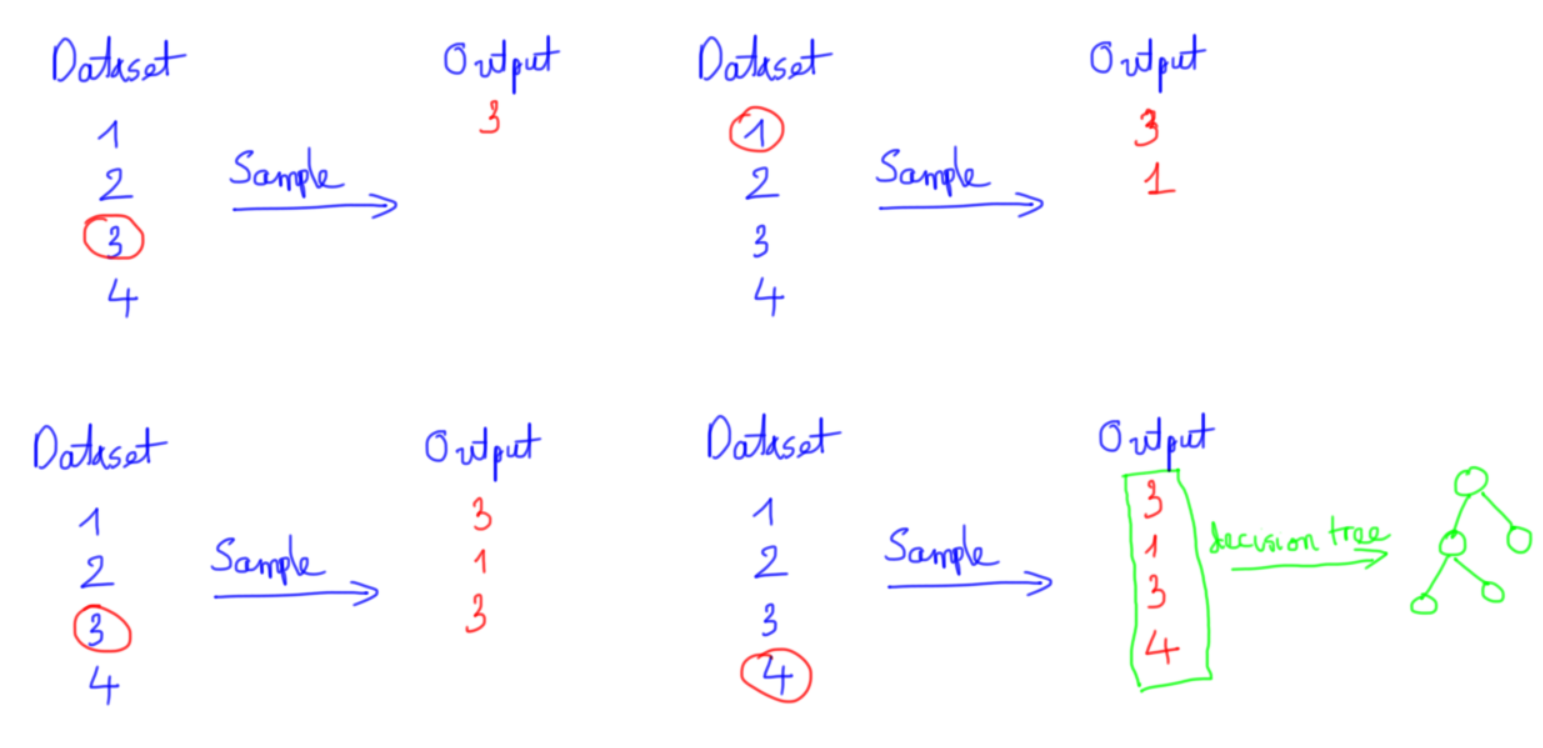

2) Sau khi sample được n dữ liệu từ bước 1 thì mình chọn ngẫu nhiên ở k thuộc tính (k < n). Giờ mình được bộ dữ liệu mới gồm n dữ liệu và mỗi dữ liệu có k thuộc tính.

3) Dùng thuật toán Decision Tree để xây dựng cây quyết định với bộ dữ liệu ở bước 2

Do quá trính xây dựng mỗi cây quyết định đều có yếu tố ngẫu nhiên (random) nên kết quả là các cây quyết định trong thuật toán Random Forest có thể khác nhau.

Thuật toán Random Forest sẽ bao gồm nhiều cây quyết định, mỗi cây được xây dựng dùng thuật toán Decision Tree trên tập dữ liệu khác nhau và dùng tập thuộc tính khác nhau. Sau đó kết quả dự đoán của thuật toán Random Forest sẽ được tổng hợp từ các cây quyết định.

Khi dùng thuật toán Random Forest, mình hay để ý các thuộc tính như: số lượng cây quyết định sẽ xây dựng, số lượng thuộc tính dùng để xây dựng cây. Ngoài ra, vẫn có các thuộc tính của thuật toán Decision Tree để xây dựng cây như độ sâu tối đa, số phần tử tối thiểu trong 1 node để có thể tách.





## Tại sao thuật toán Random Forest tốt
Trong thuật toán Decision Tree, khi xây dựng cây quyết định nếu để độ sâu tùy ý thì cây sẽ phân loại đúng hết các dữ liệu trong tập training dẫn đến mô hình có thể dự đoán tệ trên tập validation/test, khi đó mô hình bị overfitting, hay nói cách khác là mô hình có high variance.

Thuật toán Random Forest gồm nhiều cây quyết định, mỗi cây quyết định đều có những yếu tố ngẫu nhiên:

1) Lấy ngẫu nhiên dữ liệu để xây dựng cây quyết định.

2) Lấy ngẫu nhiên các thuộc tính để xây dựng cây quyết định.

Do mỗi cây quyết định trong thuật toán Random Forest không dùng tất cả dữ liệu training, cũng như không dùng tất cả các thuộc tính của dữ liệu để xây dựng cây nên mỗi cây có thể sẽ dự đoán không tốt, khi đó mỗi mô hình cây quyết định không bị overfitting mà có thế bị underfitting, hay nói cách khác là mô hình có high bias. Tuy nhiên, kết quả cuối cùng của thuật toán Random Forest lại tổng hợp từ nhiều cây quyết định, thế nên thông tin từ các cây sẽ bổ sung thông tin cho nhau, dẫn đến mô hình có low bias và low variance, hay mô hình có kết quả dự đoán tốt.

Ý tưởng tổng hợp các cây quyết định của thuật toán Random Forest giống với ý tưởng của The Wisdom of Crowds được đề xuất bởi by James Surowiecki vào năm 2004. The Wisdom of Crowds nói rằng thông thường tổng hợp thông tin từ 1 nhóm sẽ tốt hơn từ một cá nhân. Ở thuật toán Random Forest mình cũng tổng hợp thông tin từ 1 nhóm các cây quyết định và kết quả cho ra tốt hơn thuật toán Decision Tree với 1 cây quyết định.

Ví dụ: Mọi người muốn mua 1 sản phẩm trên tiki chẳng hạn, khi đọc review sản phẩm, nếu chỉ đọc 1 review thì có thể là ý kiến chủ quan của người đấy, hoặc sản phẩm người ấy mua không may bị lỗi gì; thông thường để có cái nhìn tốt về sản phẩm, mình hay đọc tất cả review rồi cho ra quyết định cuối cùng.

Trên đây là bài viết được trích dẫn. Tựu trung lại, mô hình Random Forest là tập hợp của rất nhiều cây quyết định (decision tree), ví dụ 400 cây. Mỗi cây là một quy luật quyết định riêng, nhưng không sử dụng tất cả features mà chỉ phần nhỏ trong số này. Ở trạng thái tối ưu, mô hình Random Forest chỉ giữ lại những features có vai trò quan trọng nhất và các features này nằm rải rác bên trong những cây quyết định. Việc một feature nào đó có số lần xuất hiện cao, có mặt trong hầu hết cây quyết định nghĩa là nó quan trọng. 

Tiếp theo là phần thực hành, trong phần thực hành dưới đây tôi sẽ sử dụng kỹ thuật phân tích mô tả cấu trúc mô hình Random Forest bằng Network Analysis mà tôi học được từ Bác sĩ Lê Ngọc Khả Nhi - PhD để thực hiện bài toán mô phỏng và áp dụng với dữ liệu thực tế. 

# Bài toán mô phỏng 

Sử dụng tính năng mô phỏng dữ liệu cho bài toán Classification của Scikit-learn để tạo ra một bộ dữ liệu mô phỏng gồm 99 features, đặt tên X1 đến X99, trong đó chỉ có 30 features thực sự quan trọng xác định nhãn của kết quả y

In [66]:
from __future__ import print_function
import warnings
warnings.filterwarnings('ignore')

from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split 

import numpy as np
import pandas as pd

from numpy import random as nprand
import random
nprand.seed(100)
random.seed(100)

import networkx as nx

import seaborn as sns
sns.set_style('white')
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt
%matplotlib inline

import folium
from folium import Choropleth, Circle, Marker 
from folium.plugins import HeatMap, MarkerCluster 

plt.rcParams.update({
    'figure.figsize': (15, 15),
    'axes.spines.right': False,
    'axes.spines.left': False,
    'axes.spines.top': False,
    'axes.spines.bottom': False})

In [67]:
X, y = make_classification(n_samples=1000, n_features=99,
                           n_informative=30, n_redundant=5,
                           random_state=0, shuffle=False)

In [68]:
X_df = pd.DataFrame(X, columns=['X' + str(i + 1) for i in range(99)])
X_df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X90,X91,X92,X93,X94,X95,X96,X97,X98,X99
0,3.462962,5.628151,4.488086,1.396804,-0.889554,2.078864,-5.671543,1.956361,4.664227,-3.124281,...,-0.349118,1.326554,0.315760,0.734925,-0.330677,-0.079398,-1.454711,-0.975090,2.571861,-0.437246
1,-2.838654,-0.637757,3.606276,-4.726478,-2.642099,-6.435556,0.568123,3.080461,-5.602637,3.187399,...,-0.365935,0.773111,-0.808261,-1.810344,-0.442108,-0.931159,-0.619063,-1.683609,0.622535,1.800472
2,-4.919106,-1.595852,-1.777065,-0.857746,2.112761,-2.725796,0.119252,2.596656,2.535732,-2.061782,...,0.385292,1.059512,-0.192498,-0.795989,0.551896,0.107350,2.064428,-1.337988,2.143927,0.068410
3,-3.147257,-7.568612,-1.258002,-3.130901,-5.351344,1.822418,4.223145,-0.592883,-2.213313,2.246038,...,1.881735,1.149433,-0.018327,-1.165920,1.505795,2.761935,-0.794179,0.028772,-0.710777,-0.242499
4,2.881252,3.518284,2.474528,-3.492968,-2.570913,-1.860012,-2.305512,-2.075631,-0.145203,-3.449954,...,-0.307612,0.083934,-0.213276,-0.444384,1.113961,-0.537117,0.687873,0.621180,0.129590,-0.140080


Tiếp theo dựng một mô hình Random Forest Classifier trên tập X này, với 500 cây quyết định bên trong

In [69]:
clf = RandomForestClassifier(max_depth = 5, random_state = 0, n_estimators = 500)
clf.fit(X_df, y)

RandomForestClassifier(max_depth=5, n_estimators=500, random_state=0)

In [70]:
clf.estimators_[:3]

[DecisionTreeClassifier(max_depth=5, max_features='auto', random_state=209652396),
 DecisionTreeClassifier(max_depth=5, max_features='auto', random_state=398764591),
 DecisionTreeClassifier(max_depth=5, max_features='auto', random_state=924231285)]

Mỗi cây quyết định như vậy có dữ liệu về những feature quan trọng nhất, dữ liệu này nằm trong thuộc tính features importances

In [71]:
clf.estimators_[99].feature_importances_

array([0.03399264, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.06785122, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.15793902, 0.        , 0.        ,
       0.04026953, 0.03137482, 0.        , 0.04849086, 0.        ,
       0.08187362, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.010623  , 0.13627282, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.04210834, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.03273958, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.01041175,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.02062227, 0.03057012, 0.03600079,
       0.02739001, 0.        , 0.        , 0.02077975, 0.        ,
       0.        , 0.        , 0.        , 0.03306057, 0.        ,
       0.05951219, 0.0327568 , 0.        , 0.        , 0.     

In [72]:
sum(clf.estimators_[99].feature_importances_ > 0)

21

Mức độ quan trọng của mỗi feature có thể được khảo sát bằng variable importance, như kết quả trên hầu hết features có importance score =0.0, cho thấy các features này không tham gia vào quy luật của cây quyết định, cây thứ 99 chỉ có 21 features là quan trọng. 

Phương pháp này không thể hiện được mối liên hệ giữa các features quan trọng với nhau: một nhóm features tự nhiên sẽ có liên hệ với nhau khi cùng thuộc về cấu trúc của một decision tree. Ngoài việc tham gia một cách riêng lẻ, một feature có thể hợp tác với vài features khác tạo ra quy luật cho cây quyết định, và việc một nhóm features thường xuyên xuất hiện trong nhiều cây, cho thấy chúng là một tập hợp features quan trọng. 

Bằng network analysis, ta có thể khảo sát đồng thời vai trò đóng góp của từng feature và liên hệ giữa chúng. Trong network này, features là nodes, và một edge được hình thành giữa 2 features khi chúng cùng tham gia vào 1 cây quyết định.

Ta viết hàm để chuyển thông tin về features importance thành network, hàm này nhận dữ liệu đầu vào là 1 mô hình random forest, danh sách features trong tập X, và ngưỡng features importance.

Network được tạo ra thuộc loại không định hướng (Graph), mỗi lần 1 feature xuất hiện trong 1 cây quyết định và có features importance score lớn hơn ngưỡng quy định, nó sẽ được đưa vào network như 1 node, số lần feature này xuất hiện qua nhiều cây quyết định sẽ được cộng lại để tạo ra thuộc tính count, giá trị feature importance cũng được cộng lại để tạo ra thuộc tính score, cuối cùng thuộc tính avg_vimp là trung bình của feature importance = tổng score / tổng count. Khi 2 features cùng có mặt trong 1 cây, 1 edge giữa 2 nodes được tạo ra, số lần bắt cặp này cũng được ghi nhận trong thuộc tính count, được xem như weight của edge.

In [73]:
def random_forest_to_network(rf_mod, features, thres = 0.1):
  G = nx.Graph()
  trees = rf_mod.estimators_

  for tree in trees:
    vimp_scores = tree.feature_importances_
    vimps = features[vimp_scores > thres]
    scores = vimp_scores[vimp_scores > thres]

    for v,s in zip(vimps, scores):
      try:
        G.nodes[v]['count'] +=1
        G.nodes[v]['score'] +=s
      except KeyError:
        G.add_node(v)
        G.nodes[v]['count'] = 1 
        G.nodes[v]['score'] = s 
      for w in vimps:
        try: 
          G.edges[v, w]['count'] +=1
        except KeyError:
          G.add_edge(v, w, count=1)

  for n, d in G.nodes(data = True):
    G.nodes[n]['avg_vimp'] = d['score']/d['count']

  return G

Ta áp dụng hàm này cho mô hình và danh sách X1-X99

In [74]:
features = np.array(X_df.columns)

G = random_forest_to_network(clf, features, thres = 0.13)

In [75]:
len(G.nodes)

37

Ta thấy có 37 features (nodes) được đưa vào network

In [76]:
len(G.edges)

123

Và có 123 cặp liên kết. Các thuộc tính của nodes: 

In [77]:
G.nodes(data = True)

NodeDataView({'X13': {'count': 133, 'score': 25.47082490067042, 'avg_vimp': 0.19150996165917608}, 'X26': {'count': 17, 'score': 2.653347900709986, 'avg_vimp': 0.156079288277058}, 'X10': {'count': 166, 'score': 34.268973715060795, 'avg_vimp': 0.20643960069313733}, 'X32': {'count': 14, 'score': 2.131617813697247, 'avg_vimp': 0.15225841526408906}, 'X16': {'count': 35, 'score': 5.370729211423125, 'avg_vimp': 0.1534494060406607}, 'X29': {'count': 35, 'score': 5.505050132208825, 'avg_vimp': 0.15728714663453786}, 'X11': {'count': 25, 'score': 4.149074356118276, 'avg_vimp': 0.16596297424473103}, 'X7': {'count': 15, 'score': 2.280439449359999, 'avg_vimp': 0.15202929662399992}, 'X21': {'count': 11, 'score': 1.63518467186328, 'avg_vimp': 0.14865315198757093}, 'X2': {'count': 26, 'score': 3.9174910015754367, 'avg_vimp': 0.1506727308298245}, 'X12': {'count': 20, 'score': 3.1513835688089147, 'avg_vimp': 0.15756917844044574}, 'X65': {'count': 1, 'score': 0.1434145552394074, 'avg_vimp': 0.143414555239

Các thuộc tính của edges: 

In [78]:
G.edges(data =True)

EdgeDataView([('X13', 'X13', {'count': 133}), ('X13', 'X10', {'count': 46}), ('X13', 'X32', {'count': 6}), ('X13', 'X16', {'count': 20}), ('X13', 'X65', {'count': 2}), ('X13', 'X7', {'count': 6}), ('X13', 'X1', {'count': 2}), ('X13', 'X12', {'count': 10}), ('X13', 'X3', {'count': 2}), ('X13', 'X29', {'count': 12}), ('X13', 'X26', {'count': 2}), ('X13', 'X25', {'count': 2}), ('X13', 'X11', {'count': 8}), ('X13', 'X96', {'count': 2}), ('X13', 'X2', {'count': 4}), ('X13', 'X24', {'count': 4}), ('X13', 'X4', {'count': 4}), ('X13', 'X21', {'count': 4}), ('X13', 'X49', {'count': 2}), ('X13', 'X28', {'count': 2}), ('X13', 'X20', {'count': 2}), ('X26', 'X26', {'count': 17}), ('X26', 'X12', {'count': 4}), ('X26', 'X34', {'count': 2}), ('X26', 'X11', {'count': 2}), ('X26', 'X32', {'count': 2}), ('X26', 'X88', {'count': 2}), ('X26', 'X2', {'count': 2}), ('X26', 'X18', {'count': 2}), ('X26', 'X10', {'count': 2}), ('X26', 'X29', {'count': 2}), ('X10', 'X10', {'count': 166}), ('X10', 'X32', {'count'

Trong bài viết Bs Nhi đã dùng spring_layout để vẽ sơ đồ network như hình kết quả bên dưới https://networkx.org/documentation/stable/reference/generated/networkx.drawing.layout.spring_layout.html

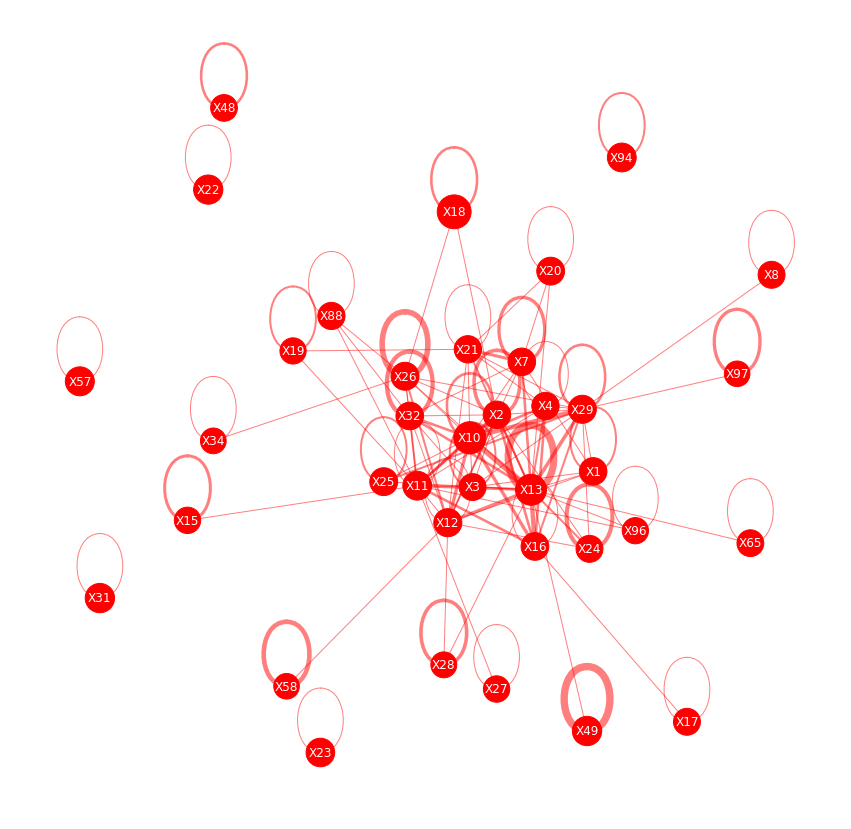

In [79]:
node_sizes = [5000*d['avg_vimp'] for n, d in G.nodes(data = True)]
weights = [np.log2(d['count']) for s, t, d in G.edges(data = True)]

pos = nx.spring_layout(G, k= 0.7)

nx.draw_networkx_nodes(G, pos, alpha = 1.0, node_size = node_sizes , node_color = 'red')
nx.draw_networkx_labels(G, pos, font_size = 12, font_color = 'white')
nx.draw_networkx_edges(G, pos, edge_color="red", width = weights, alpha=0.5)

Tôi sẽ thử dùng spiral_layout, với parameter là equidistant định dạng True

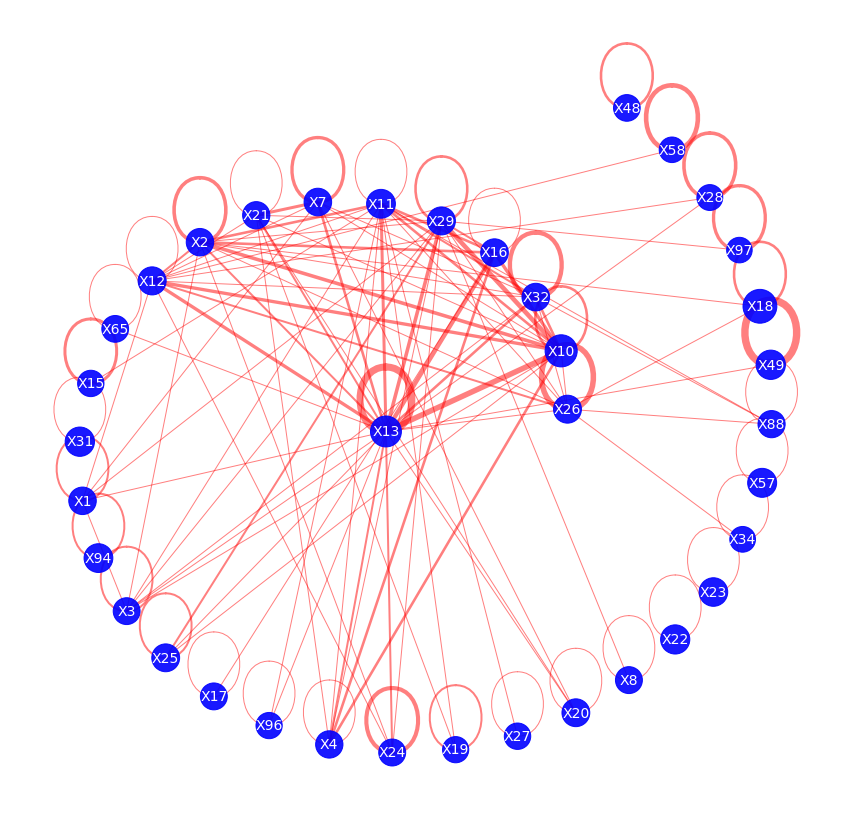

In [80]:
node_sizes = [5000*d['avg_vimp'] for n, d in G.nodes(data = True)]
weights = [np.log2(d['count']) for s, t, d in G.edges(data = True)]

pos = nx.spiral_layout(G, equidistant = True)

nx.draw_networkx_nodes(G, pos, alpha = 0.9, node_size = node_sizes , node_color = 'blue')
nx.draw_networkx_labels(G, pos, font_size = 14, font_color = 'white')
nx.draw_networkx_edges(G, pos, edge_color="red", width = weights, alpha=0.5)

# Bài toán thực tế

Tôi sẽ thực hành trên bộ dữ liệu có liên quan đến Real Estate, mang tên House Sales in King County, USA. Vì tôi làm trong ngành BĐS nên thường sẽ có xu hướng chọn các bộ dữ liệu có liên quan. Phần này tôi sẽ không thực hiện chi tiết các bước tiền xử lý dữ liệu trước khi đi vào dựng mô hình mà chỉ tập trung vào nội dung mô tả mô hình Random Forest bằng network.

Bộ dữ liệu có thể [download tại đây](https://www.kaggle.com/datasets/harlfoxem/housesalesprediction) hoặc có thể [download tại Github](https://raw.githubusercontent.com/namvukhoa/Machine-Learning-Practice/Random-Forest-Alg/kc_house_data.csv) của tôi. Đây là bộ dữ liệu giá giao dịch và đặc điểm của BĐS tại Seattle, King County, US. Bao gồm:

- Observations (quan sát) = 21,613 
- Variables (biến dữ liệu) = 21
- Years = 2014-2015


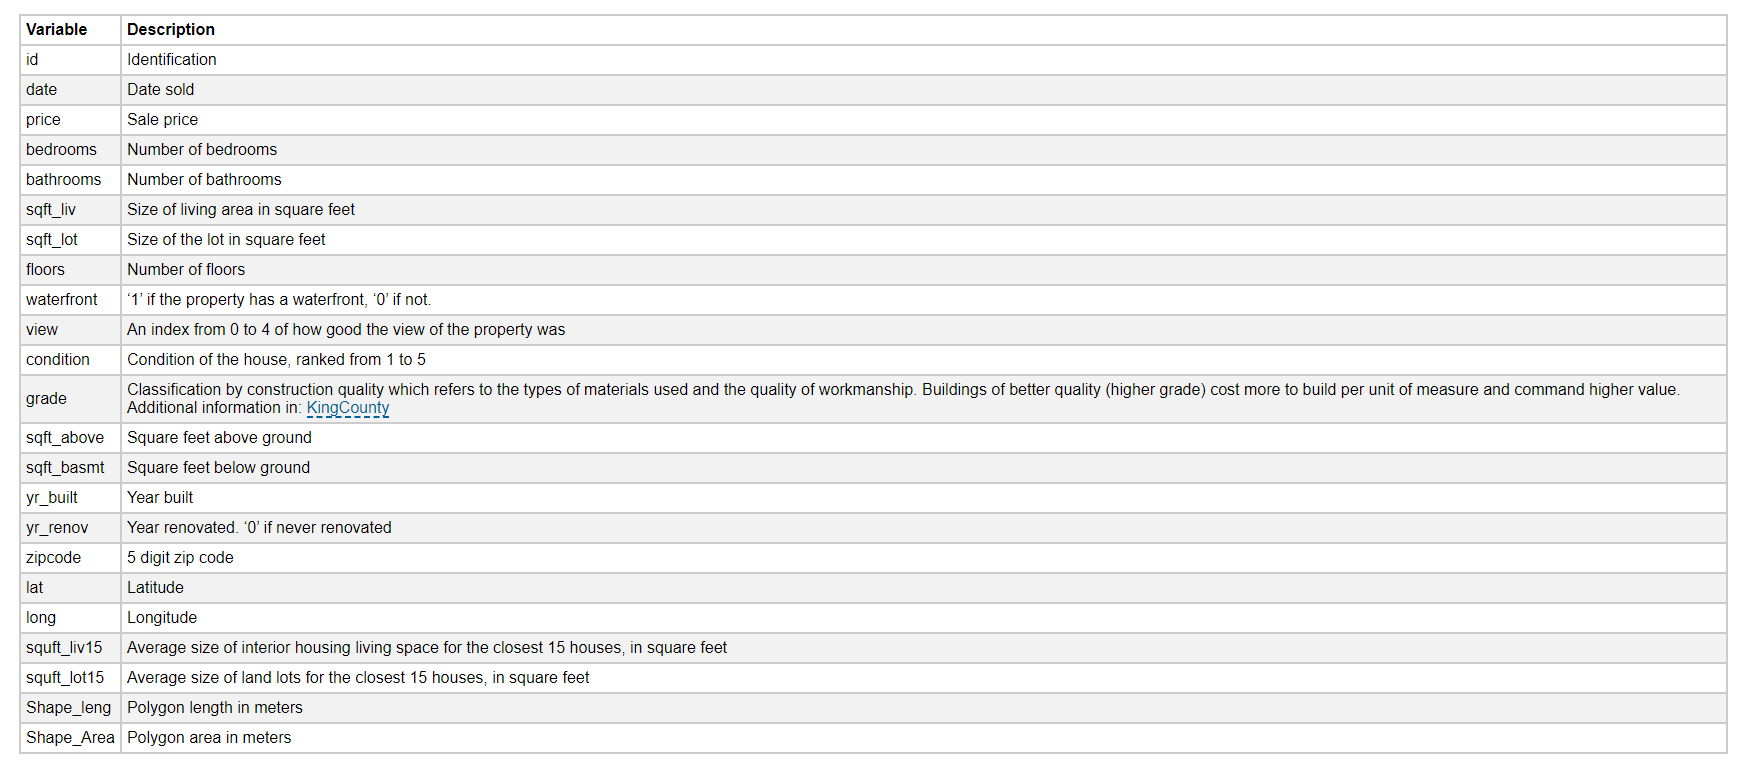

Hình ảnh: mô tả các biến dữ liệu [(Nguồn)](https://geodacenter.github.io/data-and-lab/KingCounty-HouseSales2015/)

In [81]:
df = pd.read_csv("https://raw.githubusercontent.com/namvukhoa/Machine-Learning-Practice/Random-Forest-Alg/kc_house_data.csv")
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [82]:
df.shape

(21613, 21)

In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

<Figure size 720x720 with 0 Axes>

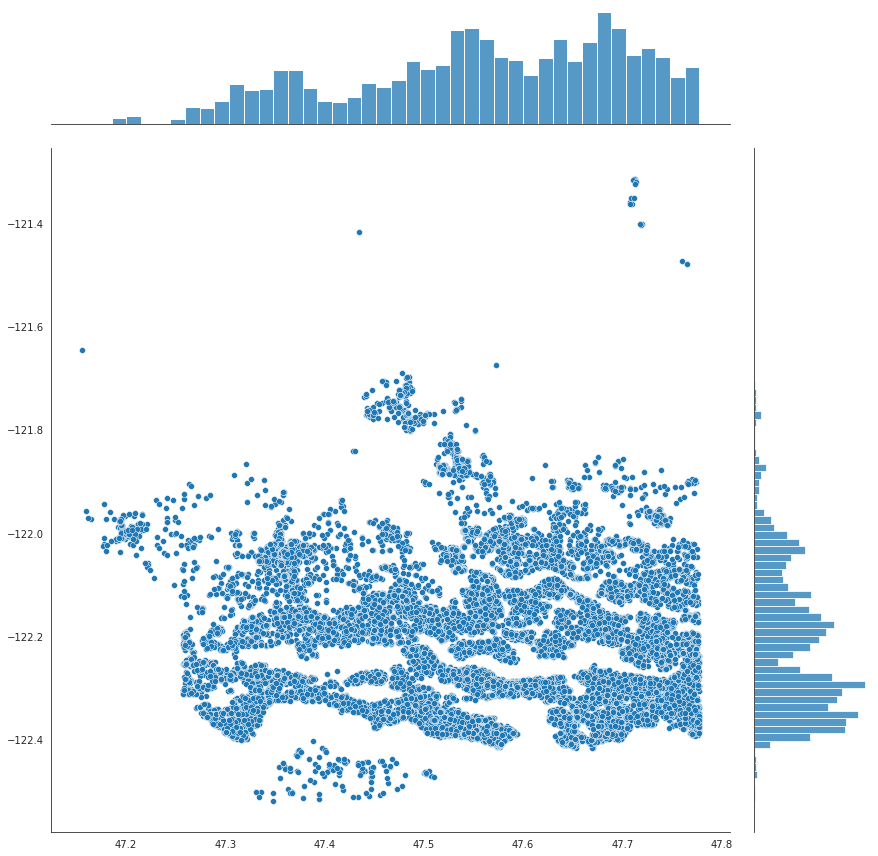

<function seaborn.utils.despine>

In [84]:
plt.figure(figsize=(10,10))
sns.jointplot(x=df.lat.values, y=df.long.values, size=12)
plt.ylabel('Longitude', fontsize=12)
plt.xlabel('Latitude', fontsize=12)
plt.show()
sns.despine

In [85]:
#!pip install pandas-profiling==2.7.1

In [86]:
#!pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

In [87]:
#from pandas_profiling import ProfileReport
#import pandas_profiling as pp

Để làm EDA có thể sử dụng Pandas Profiling để tiết kiệm thời gian ngoài ra công cụ này cũng rất hữu hiệu trong việc thăm dò dữ liệu khuyết (Missing values), ma trận tương quan và mật độ phân bố giữa các biến. 

In [88]:
#pp.ProfileReport(df) 

Một vài thống kê cơ bản

In [89]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


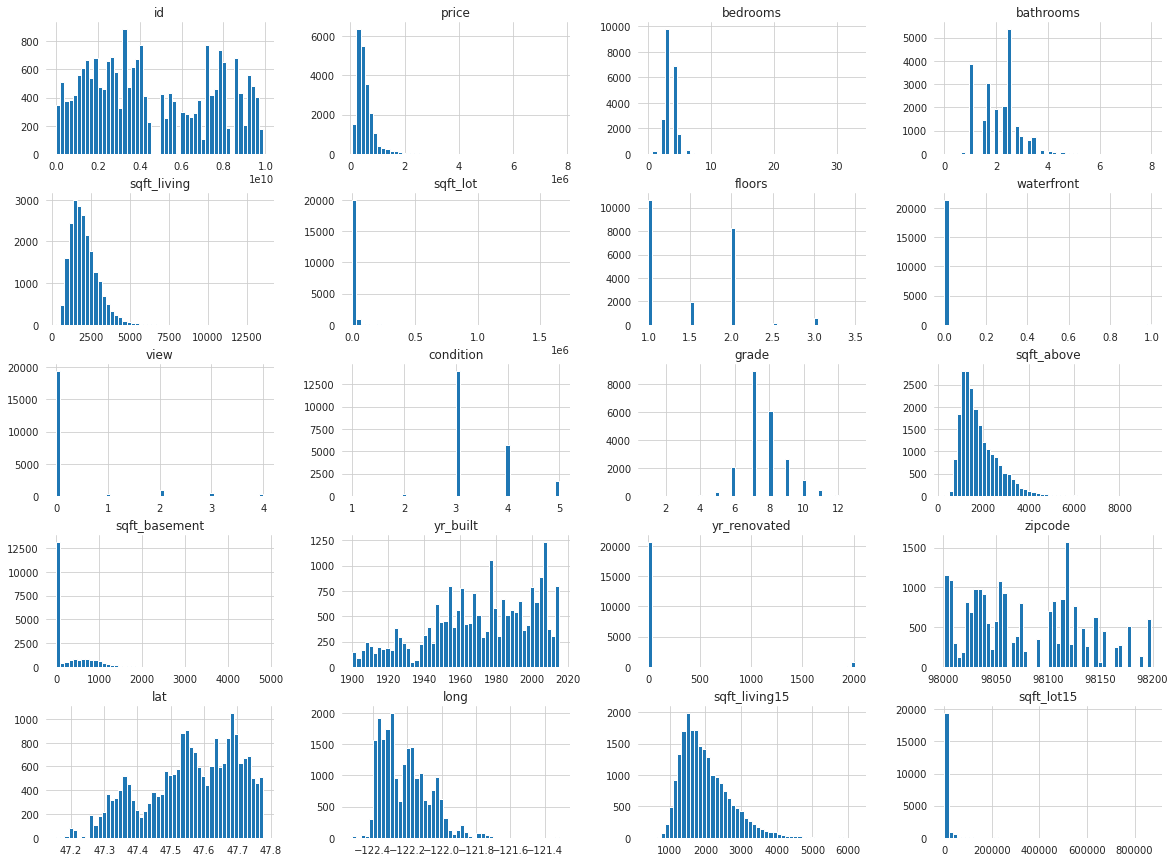

In [90]:
df.hist(bins=50, figsize=(20, 15));

### Dựng mô hình Random Forest 

In [91]:
X = df.drop(columns=['price','id', 'date'])
y = df['price']

In [92]:
clf = RandomForestClassifier(max_depth=5, random_state=123, 
                             n_estimators=500, n_jobs = -1) #
model = clf.fit(X, y)

In [93]:
model.estimators_[:5]

[DecisionTreeClassifier(max_depth=5, max_features='auto', random_state=843828734),
 DecisionTreeClassifier(max_depth=5, max_features='auto', random_state=914636141),
 DecisionTreeClassifier(max_depth=5, max_features='auto',
                        random_state=1228959102),
 DecisionTreeClassifier(max_depth=5, max_features='auto',
                        random_state=1840268610),
 DecisionTreeClassifier(max_depth=5, max_features='auto', random_state=974319580)]

In [94]:
imp_features = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending = False)
imp_features

lat              0.206845
sqft_living      0.128600
grade            0.090455
sqft_living15    0.087178
sqft_above       0.074357
sqft_lot15       0.061946
long             0.058403
sqft_lot         0.057202
bathrooms        0.048150
yr_built         0.042787
zipcode          0.034626
sqft_basement    0.033030
bedrooms         0.024150
floors           0.015045
yr_renovated     0.013688
condition        0.010368
view             0.009814
waterfront       0.003356
dtype: float64

In [95]:
features = np.array(X.columns)

In [96]:
features = np.array(X.columns)

G = random_forest_to_network(clf, 
                             features, 
                             thres = 0.15)

In [97]:
len(G.nodes)

11

In [98]:
len(G.edges)

45

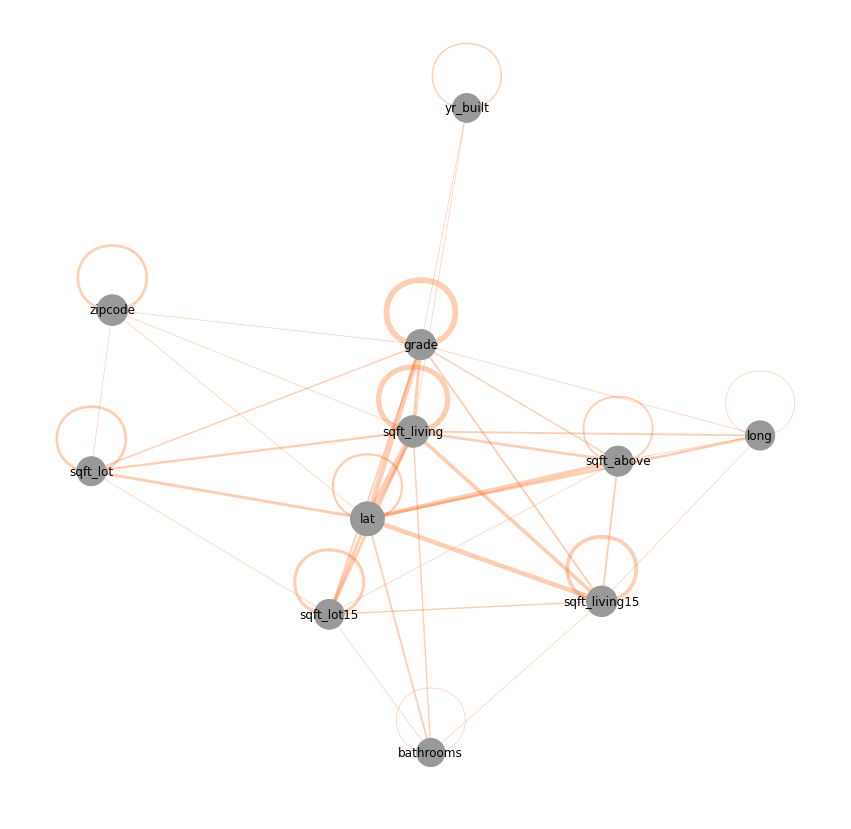

In [99]:
node_sizes = [5000*d['avg_vimp'] for n,d in G.nodes(data = True)]
weights = [np.log(d['count']) for s, t, d in G.edges(data=True)]

pos=nx.spring_layout(G)

nx.draw_networkx_nodes(G, pos, alpha=1.0, node_size = node_sizes , node_color = '#999999')
nx.draw_networkx_labels(G, pos, font_size = 12, font_color = 'black')
nx.draw_networkx_edges(G, pos, edge_color='#fc5a03',width = weights, alpha=0.3)

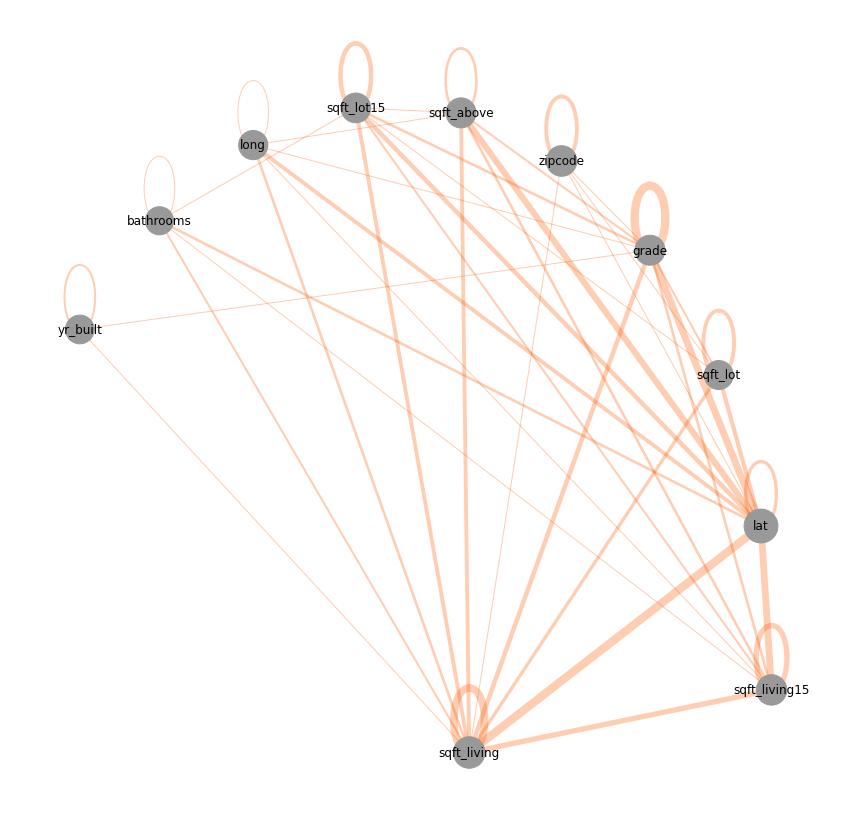

In [103]:
node_sizes = [5000*d['avg_vimp'] for n,d in G.nodes(data = True)]
weights = [np.log2(d['count']) for s, t, d in G.edges(data=True)]

pos=nx.spiral_layout(G, equidistant = True)

nx.draw_networkx_nodes(G, pos, alpha=1.0, node_size = node_sizes , node_color = '#999999')
nx.draw_networkx_labels(G, pos, font_size = 12, font_color = 'black')
nx.draw_networkx_edges(G, pos, edge_color='#fc5a03',width = weights, alpha=0.3)